# Compare to alternative models

In [1]:

from bayes_window.generative_models import generate_fake_spikes
from bayes_window.model_comparison import *
from bayes_window import BayesWindow

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=140,
                                                                n_neurons=10,
                                                                n_mice=8,
                                                                dur=7, 
                                                               mouse_response_slope=20,
                                                               overall_stim_response_strength=4)

## Bayesian

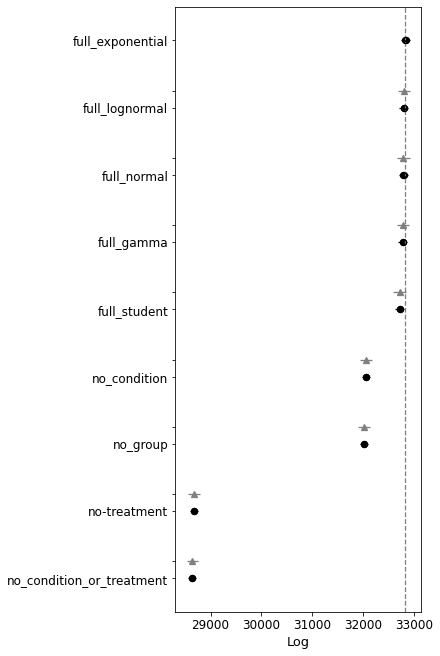

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
full_exponential,0,32828.062178,10.130072,0.000000,0.215642,84.046333,0.000000,False,log
full_lognormal,1,32796.773767,10.074282,31.288412,0.213029,87.146987,120.939881,False,log
full_normal,2,32789.329774,10.209585,38.732404,0.194604,85.563650,119.631260,False,log
full_gamma,3,32774.758427,10.071718,53.303751,0.198799,84.159242,118.810871,False,log
full_student,4,32713.285916,9.951363,114.776262,0.178041,86.120049,120.152971,False,log
no_condition,5,32059.408070,3.461760,768.654109,0.000054,81.847853,117.245770,False,log
no_group,6,32017.948075,3.310025,810.114103,0.000054,82.771409,117.612882,False,log
no-treatment,7,28679.234768,2.005346,4148.827410,0.000016,74.302598,112.083275,False,log
no_condition_or_treatment,8,28642.456469,2.039860,4185.605709,0.000000,76.371227,113.845165,False,log


In [3]:
window = BayesWindow(df, y='isi', treatment='stim', group='mouse', condition='neuron')
window.fit_slopes(model=models.model_hierarchical, do_mean_over_trials=True,)
window.explore_models()

Simple one-way ANOVA:

In [4]:
window.fit_anova()

isi~stim
           sum_sq    df     F  PR(>F)
stim         0.0   1.0  53.8     0.0
Residual     0.0  14.0   NaN     NaN


True

## Linear mixed effects model

In [7]:
window = BayesWindow(df, y='isi', treatment='stim', group='mouse', condition='neuron_x_mouse')
window.fit_lme()
window.posterior

Using formula isi ~ (1|mouse) + stim| neuron_x_mouse__0 + stim|neuron_x_mouse__1 + stim|neuron_x_mouse__2 + stim|neuron_x_mouse__3 + stim|neuron_x_mouse__4 + stim|neuron_x_mouse__5 + stim|neuron_x_mouse__6 + stim|neuron_x_mouse__7 + stim|neuron_x_mouse__8 + stim|neuron_x_mouse__9 + stim|neuron_x_mouse__10 + stim|neuron_x_mouse__11 + stim|neuron_x_mouse__12 + stim|neuron_x_mouse__13 + stim|neuron_x_mouse__14 + stim|neuron_x_mouse__15 + stim|neuron_x_mouse__16 + stim|neuron_x_mouse__17 + stim|neuron_x_mouse__18 + stim|neuron_x_mouse__19 + stim|neuron_x_mouse__20 + stim|neuron_x_mouse__21 + stim|neuron_x_mouse__22 + stim|neuron_x_mouse__23 + stim|neuron_x_mouse__24 + stim|neuron_x_mouse__25 + stim|neuron_x_mouse__26 + stim|neuron_x_mouse__27 + stim|neuron_x_mouse__28 + stim|neuron_x_mouse__29 + stim|neuron_x_mouse__30 + stim|neuron_x_mouse__31 + stim|neuron_x_mouse__32 + stim|neuron_x_mouse__33 + stim|neuron_x_mouse__34 + stim|neuron_x_mouse__35 + stim|neuron_x_mouse__36 + stim|neuron_x_m

In [9]:
window.plot(x='neuron_x_mouse')

alt.LayerChart(...)

Of course in reality, neurons don't have this consistent variation in each mouse. This would only be applicable to a priori classes of neurons